In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotnine as p9
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [86]:
df = pd.read_csv('beauty.csv')
df.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [87]:
# Plik beauty zawiera dane z pracy Hamermesha i Parker (2005) na temat oceny
# piękna instruktorów i jakości uch nauczania dla kilku kursów na University of
# Texas. Oceny dydaktyczne przeprowadzono pod koniec semestru, a oceny urody
# dokonano później przez sześciu studentów, którzy nie uczestniczyli w 
# zajęciach i nie byli świadomi ocen kursu.

# Utwórz regresję przy użyciu piękna (zmienna btystdave), aby przewidzieć
# oceny kursu (courseevaluation), kontrolując różne inne dane wejściowe. 
# Wyświetl dopasowany model graficznie i objaśnij znaczenie każdego ze 
# współczynników wraz z pozostałym odchyleniem standardowym. Wykreślić residua
# względem dopasowanych wartości.
# Dopasuj niektóre inne modele, w tym piękno, a także inne zmienne wejściowe. 
# Rozważ co najmniej jeden model z interakcjami. Dla każdego modelu określ, 
# jakie są predyktory i jakie są dane wejściowe i wyjaśnij znaczenie każdego 
# z jego współczynników.

In [88]:
data = smf.ols('courseevaluation ~ btystdave', data=df.head(100)).fit()
wyn_data = data.params
data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.356
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.247
Time:                        15:37:47   Log-Likelihood:                -81.021
No. Observations:                 100   AIC:                             166.0
Df Residuals:                      98   BIC:                             171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8963      0.055     70.883      0.000       3.787       4.005
btystdave      0.0790      0.068      1.164      0.247      -0.056       0.214
==============================================================================
Omnibus:                       10.922   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.099
Skew:                          -0.744   Prob(JB):                      0.00389
Kurtosis:                       3.669   Cond. No.                         1.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df.head(100))
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn_data['Intercept'],slope=wyn_data['btystdave'])))

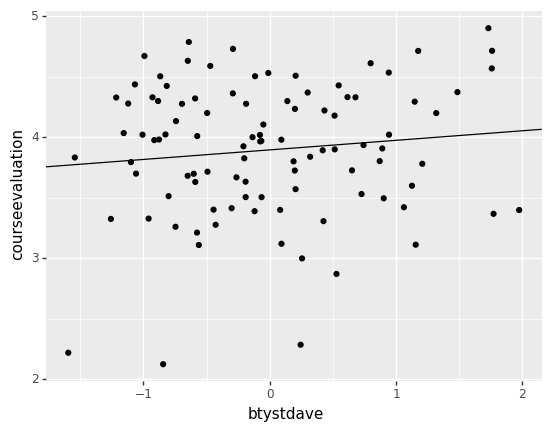

<ggplot: (5911385)>

In [90]:
fig1

In [91]:
df_data = df.tail(100).copy()
df_data['predict_1']=data.predict()
df_data['residuals_1']=abs(df_data['courseevaluation']-df_data['predict_1'])

In [92]:
fig2=(p9.ggplot(p9.aes(x='btystdave',y='residuals_1'),data=df_data)
      +p9.geom_point())

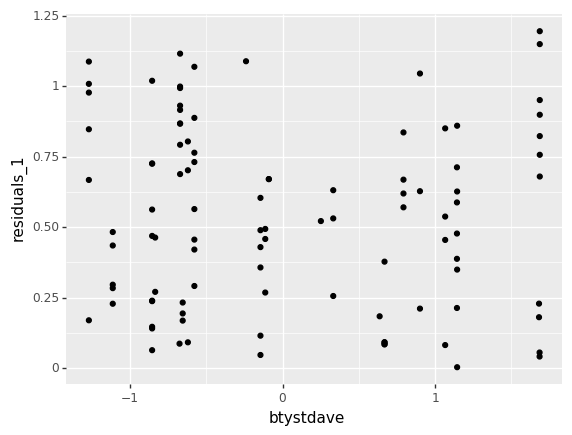

<ggplot: (5937643)>

In [93]:
# residua
fig2

In [95]:
sum(df_data['residuals_1'])/100

0.5340403362240187

In [96]:
# wykorzystuję pierwsze sto rekordów
#predyktory to - btystdave oraz female

results = smf.ols('courseevaluation ~ btystdave + female + btystdave*female', data=df_data.head(100)).fit()
wyn = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.119
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00855
Time:                        15:38:15   Log-Likelihood:                -80.762
No. Observations:                 100   AIC:                             169.5
Df Residuals:                      96   BIC:                             179.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2352      0.067     63.323      0.000       4.102       4.368
btystdave            0.1749      0.069      2.544      0.013       0.038       0.311
female              -0.3153      0.125     -2.522      0.013      -0.563      -0.067
btystdave:female    -0.0692      0.137     -0.506      0.614      -0.341       0.203
==============================================================================
Omnibus:                        5.337   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.064
Skew:                          -0.370   Prob(JB):                        0.131
Kurtosis:                       2.346   Cond. No.                         2.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
fig3=(p9.ggplot(p9.aes(x='female',y='courseevaluation'),data=df_data.head(100))
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['female'])))

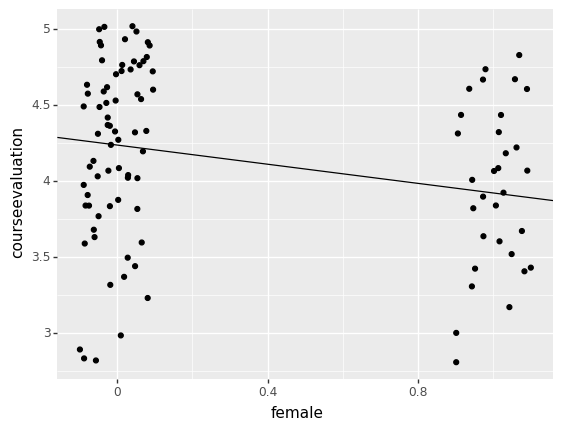

<ggplot: (5898111)>

In [98]:
fig3

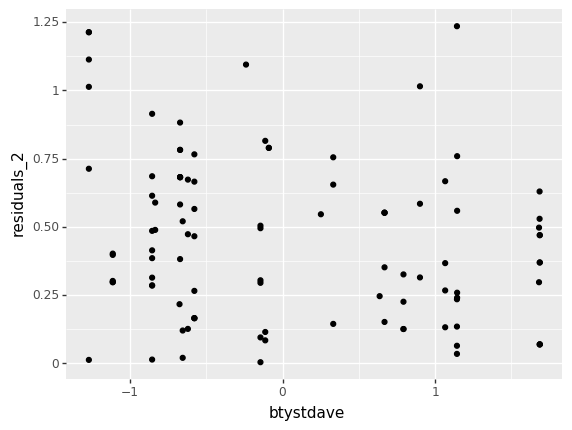

<ggplot: (5895485)>

In [99]:
df_data['predict_2']=results.predict()
df_data['residuals_2']=abs(df_data['courseevaluation']-df_data['predict_2'])
fig_4=(p9.ggplot(p9.aes(x='btystdave',y='residuals_2'),data=df_data)
      +p9.geom_point())
fig_4

In [100]:
sum(df_data['residuals_2'])/100

0.4539548610198078

In [101]:
# wykorzystuję pierwsze sto rekordów
#predyktory to - btystdave oraz profevaluation

results = smf.ols('courseevaluation ~ btystdaveneg + profevaluation', data=df_data.head(100)).fit()
wyn = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     316.0
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           3.29e-43
Time:                        15:38:40   Log-Likelihood:                 14.029
No. Observations:                 100   AIC:                            -22.06
Df Residuals:                      97   BIC:                            -14.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0128      0.177     -0.073      0.942      -0.363       0.338
btystdaveneg      -0.0304      0.052     -0.590      0.557      -0.133       0.072
profevaluation     0.9652      0.039     24.496      0.000       0.887       1.043
==============================================================================
Omnibus:                       72.994   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.981
Skew:                          -2.420   Prob(JB):                     4.69e-91
Kurtosis:                      11.741   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

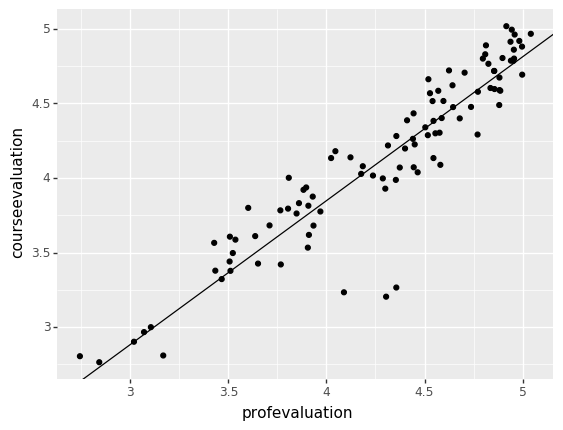

<ggplot: (1429421)>

In [102]:
fig=(p9.ggplot(p9.aes(x='profevaluation',y='courseevaluation'),data=df_data.head(100))
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['profevaluation'])))
fig

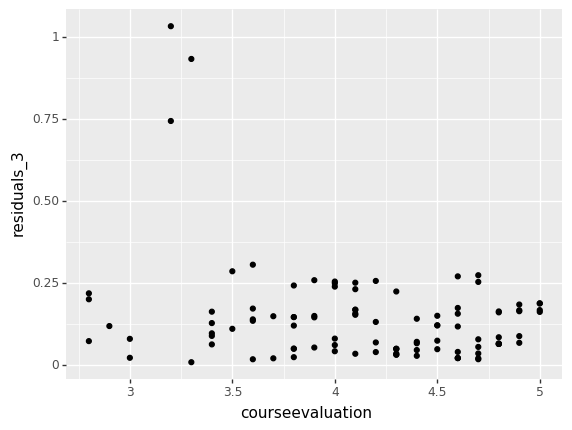

<ggplot: (1715711)>

In [103]:
df_data['predict_3']=results.predict()
df_data['residuals_3']=abs(df_data['courseevaluation']-df_data['predict_3'])
fig_res=(p9.ggplot(p9.aes(x='courseevaluation',y='residuals_3'),data=df_data)
      +p9.geom_point())
fig_res

In [104]:
sum(df_data['residuals_3'])/100

0.1411662065376153